# Transformari geometrice pentru deformarea imaginilor
Date de intrare:imagine pe nivele de gri; parametrii deformatorii.

Date de iesire/afisare rezultat: imaginea originala si histograma ei; imaginea prelucrata si histograma ei.(Linear Geometrical Transformations; Perspective Transformation)


In [187]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Importarea bibliotecilor necesare
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as img

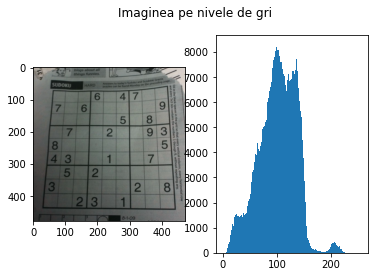

In [188]:
# Citirea imaginii pe nivele si histograma ei
img1 = cv2.imread("sudoku.jpg")
plt.suptitle('Imaginea pe nivele de gri')
plt.subplot(1,2,1); plt.imshow(img1, cmap = 'gray')
plt.subplot(1,2,2); plt.hist(img1.ravel(), 256, [0,255])
plt.show()


In [189]:
# Setarea dimensiunilor imaginii la iesire
width = 350
height = 350

In [190]:
# Setarea coordonatelor conjugate x,y (nu y,x)
input = np.float32([[62,71], [418,59], [442,443], [29,438]])
output = np.float32([[0,0], [width-1,0], [width-1,height-1], [0,height-1]])


In [191]:
# Calculul matrici perspectivei
matrix = cv2.getPerspectiveTransform(input,output)


In [192]:
#Matricea perspectivei
print(matrix.shape)
print(matrix)

(3, 3)
[[ 1.06962126e+00  9.61784781e-02 -7.31451899e+01]
 [ 3.87381282e-02  1.14923114e+00 -8.39971746e+01]
 [ 1.45318012e-04  4.58051741e-04  1.00000000e+00]]


In [193]:
# Setarea zonei pentru deformarea imaginii si alinierea imaginii 
imgOutput = cv2.warpPerspective(img1, matrix, (width,height), cv2.INTER_LINEAR, borderMode=cv2.BORDER_CONSTANT, borderValue=(0,0,0))
print(imgOutput.shape)

(350, 350, 3)


In [194]:
# Salvarea iesirii deformate
cv2.imwrite("sudoku_warped.jpg", imgOutput)


True

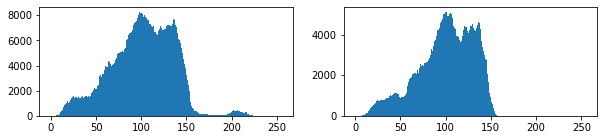

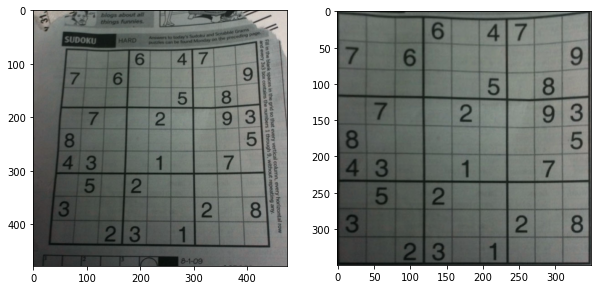

In [195]:
# Afisarea rezultatului:Imaginea originala si histograma; Imaginea prelucrata si histograma
cv2.waitKey(0)
cv2.destroyAllWindows()

plt.figure(figsize=(10,2));
plt.subplot(1,2,1); plt.hist(img1.ravel(), 256, [0,255]);
plt.subplot(1,2,2); plt.hist(imgOutput.ravel(), 256, [0,255]);
plt.show()

plt.figure( figsize = (10,10) )
plt.subplot(1,2,1); plt.imshow(img1, cmap = 'gray')
plt.subplot(1,2,2); plt.imshow(imgOutput)
plt.show()

# Scalarea imaginii


In [196]:
#Importarea bibliotecilor necesare
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as img
import math
from PIL import Image

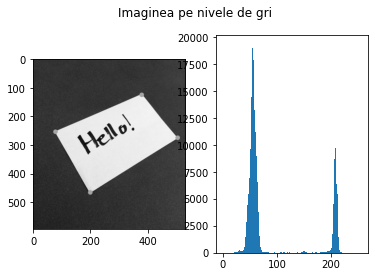

In [197]:
# Citirea imaginii pe nivele de gri
InImg = "hello.jpg"
Gray=cv2.imread(InImg,0)
img = np.array(Gray)

plt.suptitle('Imaginea pe nivele de gri')
plt.subplot(1,2,1);plt.imshow(Gray, cmap = 'gray')
plt.subplot(1,2,2);plt.hist(Gray.ravel(), 256, [0,255]);
plt.show()


In [198]:
#Setarea parametrilor pentru scalarea imaginii
sx=0.8;
sy=1.3;
height=img.shape[0]                                   
width=img.shape[1]

In [199]:
#Setarea dimensiunilor noii imagini, inaltime si latime
new_height  = round(abs(img.shape[0]*sx)+abs(img.shape[1]*0))+1
new_width  = round(abs(img.shape[1]*sy)+abs(img.shape[0]*0))+1


In [200]:
#Definirea unei noi variablie dimensiunile new_height și new _column umplute cu zerouri
Scal_Img = np.zeros((new_height,new_width))

In [201]:
#Gasirea centrului imaginii
original_centre_height   = round(((img.shape[0]+1)/2)-1)    
original_centre_width    = round(((img.shape[1]+1)/2)-1)       

In [202]:
for i in range(height):
    for j in range(width):
       #Coordonatele pixelului in raport cu centrul imaginii originale
        y0=img.shape[0]-1-i-original_centre_height               
        x0=img.shape[1]-1-j-original_centre_width

        #Coordonatele pixelului in raport cu imaginea scalata
        new_y0=round(y0)
        new_x0=round(sx*x0 + y0)

        new_y0=original_centre_height-new_y0
        new_x0=original_centre_width -new_x0
        #Adaugarea unei verificari pentru a preveni erorile
        if 0 <= new_x0 < new_width and 0 <= new_y0 < new_height and new_x0>=0 and new_y0>=0:
            Scal_Img[new_y0,new_x0]=img[i,j]     #scrierea pixelilor la noua destinatie                   


In [203]:
image=Image.fromarray((Scal_Img).astype(np.uint8))                      

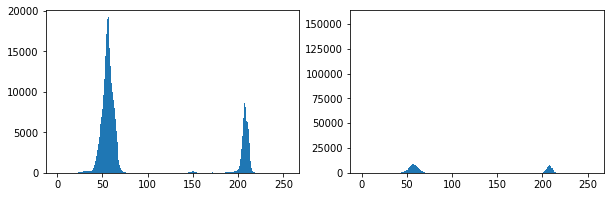

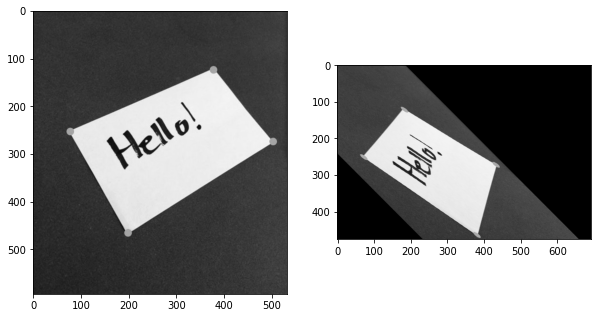

In [204]:
# Afisarea rezultatului:Imaginea originala si histograma; Imaginea prelucrata si histograma
plt.figure(figsize=(10,3));
plt.subplot(1,2,1); plt.hist(Gray.ravel(), 256, [0,255]);
plt.subplot(1,2,2); plt.hist(Scal_Img.ravel(), 256, [0,255]);
plt.show()

plt.figure( figsize = (10,10) )
plt.subplot(1,2,1); plt.imshow(Gray, cmap = 'gray')
plt.subplot(1,2,2); plt.imshow(Scal_Img,cmap = 'gray')
plt.show()

# Rotirea imaginii

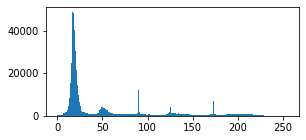

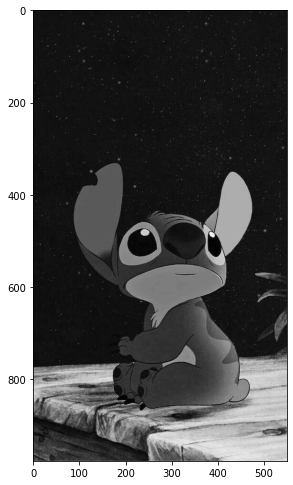

In [216]:
#Afisarea imaginii pe nivele de gri + histograma

InputIm_FileName="stitch.jpg"
InImgColor=cv2.imread(InputIm_FileName)
Gray=cv2.imread(InputIm_FileName,0)

cv2.waitKey(0)
cv2.destroyAllWindows()

plt.figure(figsize=(10,2));
plt.subplot(1,2,1); plt.hist(Gray.ravel(), 256, [0,255]);
plt.show()

plt.figure( figsize = (10,10) )
plt.subplot(1,2,2); plt.imshow(Gray, cmap = 'gray')
plt.show()


In [217]:
#Importarea biblioteciilor necesare
import math
import numpy as np
from PIL import Image

In [218]:
#Incarcarea imaginii pe nivele de gri si setarea unghiului de rotatie
img = np.array(Gray)
angle = 45

In [219]:
#Definirea variabilelor
angle=math.radians(angle)              #conversia din grade in radiani                 
cosine=math.cos(angle)
sine=math.sin(angle)
height=img.shape[0]                                   
width=img.shape[1]  

In [220]:
#Definirea inaltimii si latimii imaginii noi
new_height  = round(abs(img.shape[0]*cosine)+abs(img.shape[1]*sine))+1
new_width  = round(abs(img.shape[1]*cosine)+abs(img.shape[0]*sine))+1

In [221]:
#Definirea unei noi variablie dimensiunile new_height și new _column umplute cu zerouri
Rot_Im = np.zeros((new_height,new_width))

In [222]:
#Gasirea centrului imaginii in jurul caruia va trebui rotita imaginea
original_centre_height   = round(((img.shape[0]+1)/2)-1)    
original_centre_width    = round(((img.shape[1]+1)/2)-1)    

#gasirea centrului noii imagini obtinute
new_centre_height= round((((new_height)+1)/2)-1)        
new_centre_width= round((((new_width)+1)/2)-1)     


In [223]:
for i in range(height):
    for j in range(width):
        #coordonatele pixelului in raport cu centrul imaginii originale
        y0=img.shape[0]-1-i-original_centre_height                   
        x0=img.shape[1]-1-j-original_centre_width
                     

        #coordonatele pixelului in raport cu imaginea rotita
        new_y0=round(x0*sine+y0*cosine)
        new_x0=round(x0*cosine-y0*sine)

        #modificarea coordonatelor x si y in raport cu noul centru
        new_y0=new_centre_height-new_y0
        new_x0=new_centre_width-new_x0
        #adaugarea unei verificari pentru a preveni erorile
        if 0 <= new_x0 < new_width and 0 <= new_y0 < new_height and new_x0>=0 and new_y0>=0:
            Rot_Im[new_y0,new_x0]=img[i,j]          #scrierea pixelilor la noua destinatie                


In [224]:
#Conversia valorilor matricii in imagine
image=Image.fromarray((Rot_Im).astype(np.uint8))                      
image.save("rotated_image.png")  

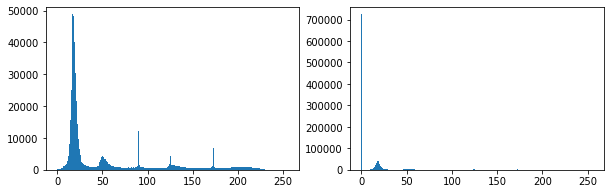

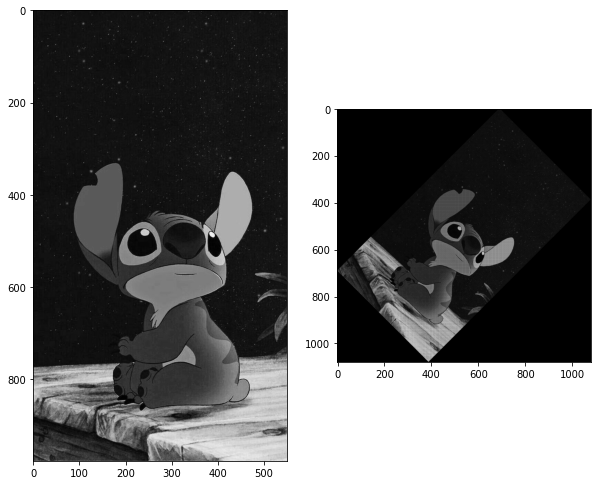

In [225]:
plt.figure(figsize=(10,3));
plt.subplot(1,2,1); plt.hist(Gray.ravel(), 256, [0,255]);
plt.subplot(1,2,2); plt.hist(Rot_Im.ravel(), 256, [0,255]);
plt.show()

plt.figure( figsize = (10,10) )
plt.subplot(1,2,1); plt.imshow(Gray, cmap = 'gray')
plt.subplot(1,2,2); plt.imshow(Rot_Im,cmap = 'gray')
plt.show()

## Translatia

In [226]:
#Importarea bibliotecilor necesare
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as img
import math
from PIL import Image

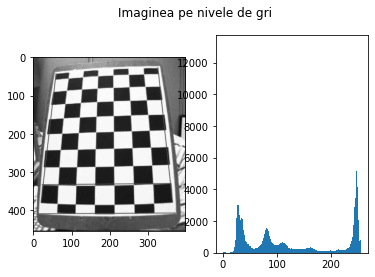

In [227]:
# Citirea imaginii pe nivele de gri + histograma ei
InImg = "sah.jpg"
Gray=cv2.imread(InImg,0)
img = np.array(Gray)

plt.suptitle('Imaginea pe nivele de gri')
plt.subplot(1,2,1); plt.imshow(Gray, cmap = 'gray')
plt.subplot(1,2,2); plt.hist(Gray.ravel(), 256, [0,255]);
plt.show()

In [228]:
#Setarea parametrilor pentru translatie
sx=1;
sy=1.2;
height=img.shape[0]                                   
width=img.shape[1]

In [229]:
#Obtinerea noilor dimensiuni ale imaginii
new_height  = round(abs(img.shape[0]*sx)+abs(img.shape[1]*0))+1
new_width  = round(abs(img.shape[1]*sy)+abs(img.shape[0]*0))+1


In [230]:
#Definirea unei noi variablie avand dimensiunile new_height și new _column umplute cu zerouri
Scal_Img = np.zeros((new_height,new_width))

In [231]:
#Gasirea centrului imaginii
original_centre_height   = round(((img.shape[0]+1)/2)-1)    
original_centre_width    = round(((img.shape[1]+1)/2)-1)       

new_centre_height= round((((new_height)+1)/2)-1)        
new_centre_width= round((((new_width)+1)/2)-1)  

In [232]:
for i in range(height):
    for j in range(width):
       #coordonatele pixelului in raport cu centrul imaginii originale
        y0=img.shape[0]-1-i-original_centre_height             
        x0=img.shape[1]-1-j-original_centre_width

        #coordonatele pixelului in raport cu imaginea translatata
        new_y0=round(sy+y0)
        new_x0=round(sx+x0)

        #adaugarea unei verificari pentru a preveni erorile
        if 0 <= new_x0 < new_width and 0 <= new_y0 < new_height and new_x0>=0 and new_y0>=0:
            Scal_Img[new_y0,new_x0]=img[i,j]                        


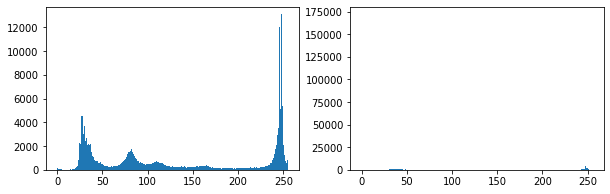

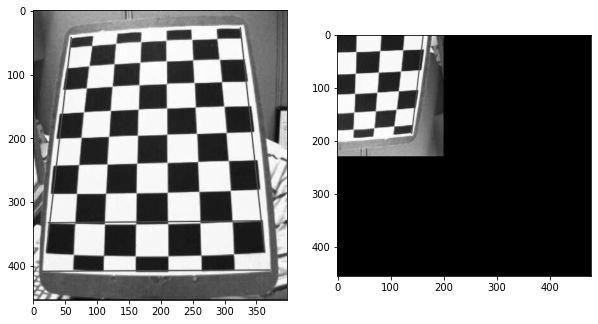

In [233]:
# Afisarea rezultatului:Imaginea originala si histograma; Imaginea prelucrata si histograma
plt.figure(figsize=(10,3));
plt.subplot(1,2,1); plt.hist(Gray.ravel(), 256, [0,255]);
plt.subplot(1,2,2); plt.hist(Scal_Img.ravel(), 256, [0,255]);
plt.show()

plt.figure( figsize = (10,10) )
plt.subplot(1,2,1); plt.imshow(Gray, cmap = 'gray')
plt.subplot(1,2,2); plt.imshow(Scal_Img,cmap = 'gray')
plt.show()